In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train= pd.read_csv("data/train.csv", na_values=-1)

In [4]:
positive_size = train[train.target==1].shape[0]

In [5]:
positive_percentage = positive_size/float(train.shape[0])

In [6]:
print("%.2f" % (positive_percentage*100), "% of the data is labelled as positive.")

3.64 % of the data is labelled as positive.


## Missing values

In [7]:
missing_values = train.apply(lambda x: sum(x.isnull())/float(len(x)), axis=0)

In [28]:
print("Top 5 Features with most missing values and the percentage:")
print(missing_values.sort_values(ascending=False).head(10))

Top 5 Features with most missing values and the percentage:
ps_car_03_cat    0.690898
ps_car_05_cat    0.447825
ps_reg_03        0.181065
ps_car_14        0.071605
ps_car_07_cat    0.019302
ps_ind_05_cat    0.009760
ps_car_09_cat    0.000956
ps_ind_02_cat    0.000363
ps_car_01_cat    0.000180
ps_ind_04_cat    0.000139
dtype: float64


In [23]:
train = train.drop(['ps_car_03_cat', 'ps_car_05_cat','id'], axis=1)

## Visualisation

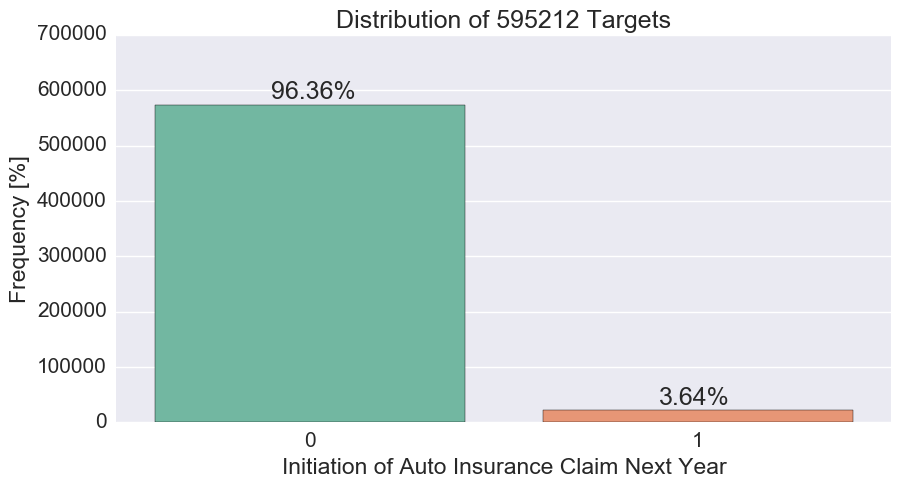

In [12]:
ax = sns.countplot(x = train.target.values ,palette="Set2")
sns.set(font_scale=1.5)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=700000)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(train)), (p.get_x()+ 0.3, p.get_height()+10000))

plt.title('Distribution of 595212 Targets')
plt.xlabel('Initiation of Auto Insurance Claim Next Year')
plt.ylabel('Frequency [%]')
plt.show()

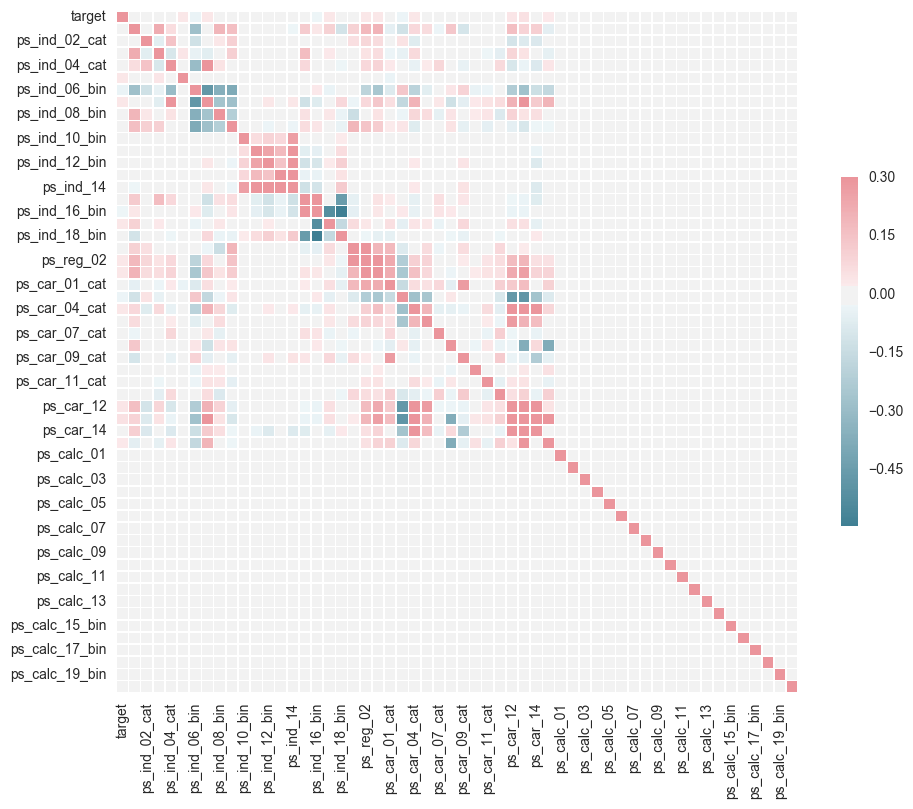

In [24]:
sns.set(style="white")

# Compute the correlation matrix
corr = train.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [25]:
abs(corr.target).sort_values()

ps_calc_04        0.000033
ps_calc_06        0.000082
ps_calc_07        0.000103
ps_calc_17_bin    0.000170
ps_calc_11        0.000371
ps_calc_13        0.000446
ps_calc_15_bin    0.000490
ps_calc_18_bin    0.000552
ps_calc_16_bin    0.000624
ps_calc_09        0.000719
ps_calc_05        0.000771
ps_calc_08        0.001006
ps_car_10_cat     0.001038
ps_calc_10        0.001061
ps_calc_20_bin    0.001072
ps_calc_12        0.001133
ps_car_11         0.001220
ps_calc_02        0.001360
ps_calc_14        0.001362
ps_calc_19_bin    0.001744
ps_calc_01        0.001782
ps_ind_10_bin     0.001815
ps_calc_03        0.001907
ps_ind_11_bin     0.002028
ps_ind_13_bin     0.002460
ps_ind_18_bin     0.004555
ps_ind_02_cat     0.005574
ps_car_09_cat     0.006013
ps_car_11_cat     0.006129
ps_ind_14         0.007443
ps_ind_12_bin     0.007810
ps_ind_09_bin     0.008237
ps_ind_03         0.008360
ps_ind_04_cat     0.010146
ps_car_06_cat     0.011537
ps_car_14         0.011674
ps_ind_08_bin     0.013147
p

## Define Gini metric

In [29]:
# Define the gini metric - from https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703#5897
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
    
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = gini_normalized(labels, preds)
    return 'gini', gini_score

## Model training

In [2]:
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

ImportError: No module named 'xgboost'

In [1]:
import xgboost as xgb

OSError: [WinError 126] The specified module could not be found

In [10]:
import os

In [11]:
mingw_path = 'C:\mingw-w64\mingw64\bin'

In [12]:
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [1]:
import xgboost

XGBoostLibraryNotFound: Cannot find XGBoost Library in the candidate path, did you install compilers and run build.sh in root path?
List of candidates:
C:\Users\Shuang\Apps\Anaconda3\lib\site-packages\xgboost\xgboost.dll
C:\Users\Shuang\Apps\Anaconda3\lib\site-packages\xgboost\../../lib/xgboost.dll
C:\Users\Shuang\Apps\Anaconda3\lib\site-packages\xgboost\./lib/xgboost.dll
C:\Users\Shuang\Apps\Anaconda3\xgboost\xgboost.dll
C:\Users\Shuang\Apps\Anaconda3\lib\site-packages\xgboost\../../windows/x64/Release/xgboost.dll
C:\Users\Shuang\Apps\Anaconda3\lib\site-packages\xgboost\./windows/x64/Release/xgboost.dll